<a href="https://colab.research.google.com/github/Joseph-Luper-Tsenum/Deep-Learning-CNN-for-Predicting-Transcription-Factor-Binding-Site-in-DNA/blob/main/TriplexFPP_joseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing packages

We will start by installing required packages. If we use hosted runtime (provided by Google) we just need to install [biopython](https://biopython.org).


# New Section

In [ ]:
# To write bash code in python jupyter cell, put ! before the command
!pip install biopython

## Loading the data

Let us clone the Github repository to access the [data](https://github.com/yuuuuzhang/TriplexFPP_data) and the [code](https://github.com/yuuuuzhang/TriplexFPP).

In [ ]:
!git clone https://github.com/yuuuuzhang/TriplexFPP_data.git  # downloading data
!git clone https://github.com/yuuuuzhang/TriplexFPP.git  # downloading code

fatal: destination path 'TriplexFPP_data' already exists and is not an empty directory.
fatal: destination path 'TriplexFPP' already exists and is not an empty directory.


Now we can load the data from [this repository](https://github.com/yuuuuzhang/TriplexFPP_data).

In [ ]:
from Bio import SeqIO

lncRNA_neg = './TriplexFPP_data/data/triplexlncRNA_neg.fa'
lncRNA_pos = './TriplexFPP_data/data/triplexlncRNA_pos.fa'
DNA_neg = './TriplexFPP_data/data/triplexDNA_neg.fa'
DNA_pos = './TriplexFPP_data/data/triplexDNA_pos.fa'

lncRNA_neg_records = list(SeqIO.parse(lncRNA_neg, "fasta"))
lncRNA_pos_records = list(SeqIO.parse(lncRNA_pos, "fasta"))
DNA_neg_records = list(SeqIO.parse(DNA_neg, "fasta"))
DNA_pos_records = list(SeqIO.parse(DNA_pos, "fasta"))

print(f'Overall we have:'
      f'\n{len(lncRNA_neg_records)} lncRNA triplex negative entries'
      f'\n{len(lncRNA_pos_records)} lncRNA triplex positive entries'
      f'\n{len(DNA_neg_records)} DNA triplex negative entries'
      f'\n{len(DNA_pos_records)} DNA triplex positive entries')

Overall we have:
36022 lncRNA triplex negative entries
531 lncRNA triplex positive entries
12735 DNA triplex negative entries
2547 DNA triplex positive entries


Now let us have a look at the data that we just loaded..

In [ ]:
lncRNA_neg_records[:5]

[SeqRecord(seq=Seq('GTGCACACGGCTCCCATGCGTTGTCTTCCGAGCGTCAGGCCGCCCCTACCCGTG...TAT'), id='ENST00000473358.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002840.1|MIR1302-2HG-202|MIR1302-2HG|712|', name='ENST00000473358.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002840.1|MIR1302-2HG-202|MIR1302-2HG|712|', description='ENST00000473358.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002840.1|MIR1302-2HG-202|MIR1302-2HG|712|', dbxrefs=[]),
 SeqRecord(seq=Seq('TCATCAGTCCAAAGTCCAGCAGTTGTCCCTCCTGGAATCCGTTGGCTTGCCTCC...GTC'), id='ENST00000469289.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002841.2|MIR1302-2HG-201|MIR1302-2HG|535|', name='ENST00000469289.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002841.2|MIR1302-2HG-201|MIR1302-2HG|535|', description='ENST00000469289.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002841.2|MIR1302-2HG-201|MIR1302-2HG|535|', dbxrefs=[]),
 SeqRecord(seq=Seq('CACACAACGGGGTTTCGGGGCTGTGGACCCTGTGCCAGGAAAGGAAGGGCGCAG...GCT')

In [ ]:
lncRNA_pos_records[:5]

[SeqRecord(seq=Seq('GCAGCGCCCCACTCAACAAAGCTTCCCGCGGGCCCTGCCCCATGACTCACCGCT...TTC'), id='ENST00000609111.1|ENSG00000272734.1|OTTHUMG00000185998.2|OTTHUMT00000471963.1|ADIRF-AS1-203|ADIRF-AS1|3822|', name='ENST00000609111.1|ENSG00000272734.1|OTTHUMG00000185998.2|OTTHUMT00000471963.1|ADIRF-AS1-203|ADIRF-AS1|3822|', description='ENST00000609111.1|ENSG00000272734.1|OTTHUMG00000185998.2|OTTHUMT00000471963.1|ADIRF-AS1-203|ADIRF-AS1|3822|', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGAGACAGCGCCGCCGGCCGTGGGGAGCGGACGCAGTGATTTGCTCCCCCTCG...ATG'), id='ENST00000574016.5|ENSG00000186594.14|OTTHUMG00000132197.7|OTTHUMT00000438379.2|MIR22HG-207|MIR22HG|557|', name='ENST00000574016.5|ENSG00000186594.14|OTTHUMG00000132197.7|OTTHUMT00000438379.2|MIR22HG-207|MIR22HG|557|', description='ENST00000574016.5|ENSG00000186594.14|OTTHUMG00000132197.7|OTTHUMT00000438379.2|MIR22HG-207|MIR22HG|557|', dbxrefs=[]),
 SeqRecord(seq=Seq('CCACAGGACAACGAAGAAAACCTATCTTCAGTCCCCACCCACGAAATGCTGGGG...TAA'), id='ENST00000655068.1|ENSG00

In [ ]:
DNA_neg_records[:5]

[SeqRecord(seq=Seq('CTCCTTCGTGGCGAAGCAGCAGGTGGAGAAGCAGCGGCCCCTGCGCTGCCTCAT...TAT'), id='chromosome:GRCh38:1:148262868:148263318:-1', name='chromosome:GRCh38:1:148262868:148263318:-1', description='chromosome:GRCh38:1:148262868:148263318:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('CCCTGGGGACACAGGCGCGGGGGAGGGGAGCGCGGCCCGCGCGGGGCAGGAGGT...GCG'), id='chromosome:GRCh38:3:32238750:32238900:-1', name='chromosome:GRCh38:3:32238750:32238900:-1', description='chromosome:GRCh38:3:32238750:32238900:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('TATTTTTCTACAATACTGAATTTGGAAAACAACAGCAACAACAACAACATCAAA...CTG'), id='chromosome:GRCh38:1:144560855:144561605:-1', name='chromosome:GRCh38:1:144560855:144561605:-1', description='chromosome:GRCh38:1:144560855:144561605:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('GTATGTGTTAGTTGTAAATCAGGACTTGGCTTTGAGATGAATCCACCTGGGTCA...AGC'), id='chromosome:GRCh38:5:147510090:147510440:-1', name='chromosome:GRCh38:5:147510090:147510440:-1', description='chromosome:GRCh38:5:147510090:147510440:-1',

In [ ]:
DNA_pos_records[:5]

[SeqRecord(seq=Seq('TTAAGAATGGTTATGTTAGGGTTGTACGGTAGAACTGCTGTTATTCATCCTATG...CTT'), id='chromosome:GRCh38:1:629800:630250:-1', name='chromosome:GRCh38:1:629800:630250:-1', description='chromosome:GRCh38:1:629800:630250:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('GGAGGGGCGGCAGGTGGTGAGTCTCGACCCCGCACTGGGCTGGCAGGGCCGAGG...GGA'), id='chromosome:GRCh38:1:1312900:1313050:-1', name='chromosome:GRCh38:1:1312900:1313050:-1', description='chromosome:GRCh38:1:1312900:1313050:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('CAGGCGTGGTGGCGCGTGCCTGTAATCCCAGCAGTTTGAGAGGCCGAGGCGGGT...AGA'), id='chromosome:GRCh38:1:1477250:1478000:-1', name='chromosome:GRCh38:1:1477250:1478000:-1', description='chromosome:GRCh38:1:1477250:1478000:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('GCCTCAACCCCCCGGGGCTTGAGGTGGGTAATCCTCCCACCTCAGCCTCCCGAG...CAC'), id='chromosome:GRCh38:1:2026750:2027100:-1', name='chromosome:GRCh38:1:2026750:2027100:-1', description='chromosome:GRCh38:1:2026750:2027100:-1', dbxrefs=[]),
 SeqRecord(seq=Seq('CGCCAGGAGGGTTG

Now let us prepare the data as it is described in the [paper](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-03864-0#MOESM1). We will use a simplified preprocessing, where we will enrich the positive data by oversampling and deplete negative data by undersampling. We will fix the data size for lncRNA triplex as `lncRNA_samples = 1500` (3 times bigger than the size of positive samples), while the data size for DNA triplex is `DNA_samples = 6000` (2.4 times bigger than the size of positive samples). Let us start by denoting some supplementary functions that we will use to extract sequence features used for training/testing.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def get_seq_name_from_records(records):
  # This function is used to extract nuclotide sequence and its id
  seq = []
  name = []
  for i in range(len(records)):
    seq.append(records[i].seq)
    name.append(records[i].id)

  return seq, name

def extract_features(seq, lbls, train_percentage):
  # This function extracts kmers and kmerscores from the sequence data

  kmer1 = kmer_encode(seq, kmerArray[0:4])
  kmer2 = kmer_encode(seq, kmerArray[4:20])
  kmer3 = kmer_encode(seq, kmerArray[20:84])

  # Extracting only train data to compute mean k-mer vectors
  seq_train, lbls_train = seq[:int(train_percentage*len(seq))], lbls[:int(train_percentage*len(lbls))]

  pos_seq = seq_train[lbls_train == 1]
  neg_seq = seq_train[lbls_train == 0]

  pos_kmers = kmer_encode(pos_seq, kmerArray)
  neg_kmers = kmer_encode(neg_seq, kmerArray)

  pos = np.mean(pos_kmers, axis=0)
  neg = np.mean(neg_kmers, axis=0)

  merscore1 = mer_score(seq, pos[0:4], neg[0:4], kmerArray[0:4],1)
  merscore2 = mer_score(seq, pos[4:20], neg[4:20], kmerArray[4:20],2)
  merscore3 = mer_score(seq, pos[20:84], neg[20:84], kmerArray[20:84],3)
  merscore4 = mer_score(seq, pos[84:340], neg[84:340], kmerArray[84:340],4)
  merscore5 = mer_score(seq, pos[340:1364], neg[340:1364], kmerArray[340:1364],5)
  merscore6 = mer_score(seq, pos[1364:5460], neg[1364:5460], kmerArray[1364:5460],6)

  features = np.concatenate((merscore1,merscore2,merscore3,merscore4,merscore5,merscore6,kmer1,kmer2,kmer3),axis=1)
  
  return np.expand_dims(features, axis=2)

def plot_metrics(history):
  # Courtesy of https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#oversample_the_minority_class
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

#####
## The functions below were taken from TriplexFPP/code/triplex_util.py file
#####

def countnum(seq,nuacid):
    # This function counts number of nucleotid occurences in the sequence
    return len([1 for i in range(len(seq)) if seq.startswith(nuacid,i)])

def construct_kmer():
  # This function creates a list containing all possible k-mers (1 <= k <= 6)
	ntarr = ("A","C","G","T")

	kmerArray = []


	for n in range(4):
		kmerArray.append(ntarr[n])

	for n in range(4):
		str1 = ntarr[n]
		for m in range(4):
			str2 = str1 + ntarr[m]
			kmerArray.append(str2)
#############################################
	for n in range(4):
		str1 = ntarr[n]
		for m in range(4):
			str2 = str1 + ntarr[m]
			for x in range(4):
				str3 = str2 + ntarr[x]
				kmerArray.append(str3)
#############################################
#change this part for 3mer or 4mer
	for n in range(4):
		str1 = ntarr[n]
		for m in range(4):
			str2 = str1 + ntarr[m]
			for x in range(4):
				str3 = str2 + ntarr[x]
				for y in range(4):
					str4 = str3 + ntarr[y]
					kmerArray.append(str4)
############################################
	for n in range(4):
		str1 = ntarr[n]
		for m in range(4):
			str2 = str1 + ntarr[m]
			for x in range(4):
				str3 = str2 + ntarr[x]
				for y in range(4):
					str4 = str3 + ntarr[y]
					for z in range(4):
						str5 = str4 + ntarr[z]
						kmerArray.append(str5)
####################### 6-mer ##############
	for n in range(4):
		str1 = ntarr[n]
		for m in range(4):
			str2 = str1 + ntarr[m]
			for x in range(4):
				str3 = str2 + ntarr[x]
				for y in range(4):
					str4 = str3 + ntarr[y]
					for z in range(4):
						str5 = str4 + ntarr[z]
						for t in range(4):
							str6 = str5 + ntarr[t]
							kmerArray.append(str6)
    
	return kmerArray

def kmer_encode(seq,kmerarray):
    # This function computes k-mer feature from the sequence
    result = np.zeros((len(seq),len(kmerarray)))
    for i in range(len(seq)):
        for j in range(len(kmerarray)):
            result[i,j] = seq[i].count(kmerarray[j])/len(seq[i])
    return result

def mer_sin(seq,nc_m,c_m,kmerarray,x):   
    # This function computes coefficient in the kmerscore
    l = len(seq)-x+1
    log_r = np.zeros((l))
    for i in range(l):
        tempseq = seq[i:i+x]
        idx = kmerarray.index(tempseq)
        Fc = c_m[int(idx)]
        Fnc = nc_m[int(idx)]
        if Fc==0 and Fnc==0:
            log_r[i]=0
        elif Fc==0 and Fnc!=0:
            log_r[i]=-1
        elif Fnc==0 and Fc!=0:
            log_r[i]=1
        else:
            log_r[i] = math.log(Fc/Fnc)
    miu = sum(log_r)/l
    
    return miu
   
def mer_score(seq,nc_m,c_m,kmerarray,x):
    # This function computes kmerscore from the sequence and mean kmers
    num_cores = multiprocessing.cpu_count()
    miu = Parallel(n_jobs=num_cores)(delayed(mer_sin)(seq_i, nc_m_i, c_m_i, kmerarray_i, x_i) for seq_i, nc_m_i, c_m_i, kmerarray_i, x_i in tqdm(zip(seq, [nc_m]*len(seq), [c_m]*len(seq), [kmerarray]*len(seq), [x]*len(seq)), desc=f'Computing {x}merscore'))
    #for i in tqdm(range(len(seq)), desc=f'Computing {x}merscore'):
    #    miu[i] = mer_sin(seq[i],nc_m,c_m,kmerarray,x)
        
    miu0 = np.expand_dims(miu, axis=1)
    return miu0

In [ ]:
from sklearn.utils import resample
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
import multiprocessing
import numpy as np
import math

_DATA_SIZE_lncRNA = 3000
_DATA_SIZE_DNA = 12000
_TRAIN_PERCENTAGE = 0.7
_VAL_PERCENTAGE = 0.15
_TEST_PERCENTAGE = 0.15

# Dropping DNA sequences with letter 'N'
DNA_neg_records = [record for record in DNA_neg_records if 'N' not in record.seq]
DNA_pos_records = [record for record in DNA_pos_records if 'N' not in record.seq]

# Extracting only sequences and names from lncRNA and DNA records
lncRNA_neg_seq, lncRNA_neg_name = get_seq_name_from_records(lncRNA_neg_records)
lncRNA_pos_seq, lncRNA_pos_name  = get_seq_name_from_records(lncRNA_pos_records)
DNA_neg_seq, DNA_neg_name = get_seq_name_from_records(DNA_neg_records)
DNA_pos_seq, DNA_pos_name = get_seq_name_from_records(DNA_pos_records)

# Oversampling positive data and undersampling negative data
lncRNA_neg_seq_balanced = resample(lncRNA_neg_seq, n_samples=_DATA_SIZE_lncRNA // 2)
lncRNA_pos_seq_balanced = resample(lncRNA_pos_seq, n_samples=_DATA_SIZE_lncRNA // 2)
DNA_neg_seq_balanced = resample(DNA_neg_seq, n_samples=_DATA_SIZE_DNA // 2)
DNA_pos_seq_balanced = resample(DNA_pos_seq, n_samples=_DATA_SIZE_DNA // 2)

# Merging positive and negative data, creating label array
lncRNA_seq = np.array(lncRNA_neg_seq_balanced + lncRNA_pos_seq_balanced, dtype=object)
DNA_seq = np.array(DNA_neg_seq_balanced + DNA_pos_seq_balanced, dtype=object)
lncRNA_labels = np.array([0]*(_DATA_SIZE_lncRNA // 2) + [1]*(_DATA_SIZE_lncRNA // 2))
DNA_labels = np.array([0]*(_DATA_SIZE_DNA // 2) + [1]*(_DATA_SIZE_DNA // 2))

# Shuffling data
lncRNA_index = np.arange(_DATA_SIZE_lncRNA)
np.random.shuffle(lncRNA_index)
DNA_index = np.arange(_DATA_SIZE_DNA)
np.random.shuffle(DNA_index)
lncRNA_seq, lncRNA_labels = lncRNA_seq[lncRNA_index], lncRNA_labels[lncRNA_index]
DNA_seq, DNA_labels = DNA_seq[DNA_index], DNA_labels[DNA_index]

# Getting a list of all possible k-mers from k = 1, to k = 6
kmerArray = construct_kmer()

In [ ]:
import os

# Extracting features for lncRNA data
if not os.path.exists('./lcrna_features.npy'):
  lncRNA_features = extract_features(lncRNA_seq, lncRNA_labels, _TRAIN_PERCENTAGE)
  np.save('./lcrna_features', lncRNA_features)

In [ ]:
# Extracting features for DNA data
if not os.path.exists('./DNA_features.npy'):
  DNA_features = extract_features(DNA_seq, DNA_labels, _TRAIN_PERCENTAGE)
  np.save('./DNA_features', DNA_features)

We successfully extracted k-mer and kmerscore features from available list of sequences. Now let us prepare the data for training.

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import losses, optimizers, metrics, layers, models, regularizers

_lncRNA_TRAIN_SIZE = int(_TRAIN_PERCENTAGE * _DATA_SIZE_lncRNA)
_lncRNA_VAL_SIZE = int(_VAL_PERCENTAGE * _DATA_SIZE_lncRNA)
_lncRNA_TEST_SIZE = int(_TEST_PERCENTAGE * _DATA_SIZE_lncRNA)
_DNA_TRAIN_SIZE = int(_TRAIN_PERCENTAGE * _DATA_SIZE_DNA)
_DNA_VAL_SIZE = int(_VAL_PERCENTAGE * _DATA_SIZE_DNA)
_DNA_TEST_SIZE = int(_TEST_PERCENTAGE * _DATA_SIZE_DNA)

lncRNA_features = np.load('./lcrna_features.npy')
DNA_features = np.load('./DNA_features.npy')

# Scale features for both datasets
lncRNA_scaler = StandardScaler()
lncRNA_train = lncRNA_features[:_lncRNA_TRAIN_SIZE]
lncRNA_scaler.fit(lncRNA_train)
lncRNA_features_scaled = lncRNA_scaler.transform(lncRNA_features)
lncRNA_features_scaled = np.expand_dims(lncRNA_features_scaled, axis=2)

DNA_scaler = StandardScaler()
DNA_train = lncRNA_features[:_DNA_TRAIN_SIZE]
DNA_scaler.fit(DNA_train)
DNA_features_scaled = DNA_scaler.transform(DNA_features)
DNA_features_scaled = np.expand_dims(DNA_features_scaled, axis=2)

# Splitting data into train, validation and test as 70%/15%/15% (denoted in the previous cell)
lncRNA_train, lncRNA_train_labels = lncRNA_features_scaled[:_lncRNA_TRAIN_SIZE], lncRNA_labels[:_lncRNA_TRAIN_SIZE]
lncRNA_test, lncRNA_test_labels = lncRNA_features_scaled[_lncRNA_TRAIN_SIZE:], lncRNA_labels[_lncRNA_TRAIN_SIZE:]
lncRNA_val, lncRNA_val_labels = lncRNA_test[:_lncRNA_VAL_SIZE], lncRNA_test_labels[:_lncRNA_VAL_SIZE]
lncRNA_test, lncRNA_test_labels = lncRNA_test[_lncRNA_TEST_SIZE:], lncRNA_test_labels[_lncRNA_TEST_SIZE:]

DNA_train, DNA_train_labels = DNA_features_scaled[:_DNA_TRAIN_SIZE], DNA_labels[:_DNA_TRAIN_SIZE]
DNA_test, DNA_test_labels = DNA_features_scaled[_DNA_TRAIN_SIZE:], DNA_labels[_DNA_TRAIN_SIZE:]
DNA_val, DNA_val_labels = DNA_test[:_DNA_VAL_SIZE], DNA_test_labels[:_DNA_VAL_SIZE]
DNA_test, DNA_test_labels = DNA_test[_DNA_TEST_SIZE:], DNA_test_labels[_DNA_TEST_SIZE:]

Now as the data is ready we are ready to build the model and train it.

In [ ]:
_EPOCHS = 50
_BATCH_SIZE = 32

_METRICS = [
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
]

lncRNA_model = models.Sequential(
    [
     layers.Conv1D(20, 8, strides=1, activation='relu', input_shape=(90, 1)),
     layers.Conv1D(20, 2, strides=1, activation='relu'),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(400, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(1, activation='sigmoid')
  ])

lncRNA_model.compile(optimizer=optimizers.Adam(lr=1e-3),
                     loss=losses.BinaryCrossentropy(),
                     metrics=_METRICS)

print(lncRNA_model.summary())

lncRNA_training_history = lncRNA_model.fit(lncRNA_train, lncRNA_train_labels, batch_size=_BATCH_SIZE,
                                           epochs=_EPOCHS, validation_data=(lncRNA_val, lncRNA_val_labels), 
                                           verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 83, 20)            180       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 82, 20)            820       
_________________________________________________________________
flatten (Flatten)            (None, 1640)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1640)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               656400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4

Now we let us plot the training history.

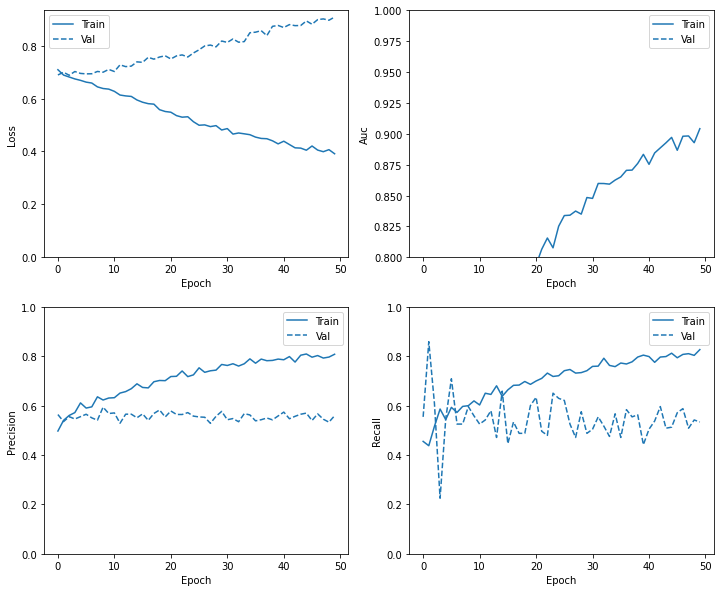

In [ ]:
plot_metrics(lncRNA_training_history)

Doing the same for the DNA data.

In [ ]:
DNA_model = models.Sequential(
    [
     layers.Conv1D(20, 8, strides=1, activation='relu', input_shape=(90, 1)),
     layers.Conv1D(20, 4, strides=1, activation='relu'),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(400, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(1, activation='sigmoid')
  ])

DNA_model.compile(
  optimizer=optimizers.Adam(lr=1e-3),
  loss=losses.BinaryCrossentropy(),
  metrics=_METRICS)

print(DNA_model.summary())

DNA_training_history = DNA_model.fit(DNA_train, DNA_train_labels, batch_size=_BATCH_SIZE,
                                     epochs=_EPOCHS, validation_data=(DNA_val, DNA_val_labels),
                                     verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 83, 20)            180       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 80, 20)            1620      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               640400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

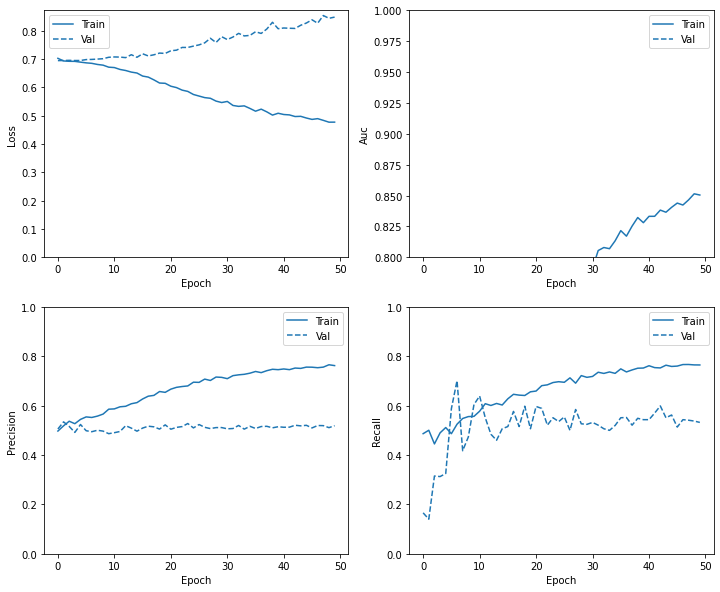

In [ ]:
plot_metrics(DNA_training_history)

Now we can test the models on the test set.

In [ ]:
lncRNA_model.evaluate(lncRNA_test, lncRNA_test_labels)

15/15 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.4911 - precision: 0.5000 - recall: 0.4847 - auc: 0.5058


[0.9073299765586853,
 0.4911110997200012,
 0.5,
 0.48471614718437195,
 0.5058388710021973]

In [ ]:
DNA_model.evaluate(DNA_test, DNA_test_labels)

57/57 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.4839 - precision: 0.4967 - recall: 0.4897 - auc: 0.4896


[0.8882991671562195,
 0.4838888943195343,
 0.49670329689979553,
 0.48970746994018555,
 0.48962533473968506]